<h1 align="center">Scientific Programming in Python</h1>
<h2 align="center"> Topic 7: Basics of Data Visualization </h2> 


_Notebook created by Martín Villanueva - `martin.villanueva@usm.cl` - DI UTFSM - May 2017._

__Note:__ Since this notebook makes use of Ipython Interactive widgets, you have to run the corresponding cell in order to visualize it properly.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
import scipy as sp
import sys

## Table of Contents
* [1.- Matplotlib](#matplotlib)
* [2.- Seaborn](#seaborn)
* [3.- Interact](#interact)

<div id='matplotlib' />
## 1.- Matplotlib


In the next section we will see how to do some of the most common tasks in __data visualization__.

__The Matplotlib Philosophy:__ 
1. Configure the object to visualize through the `matplotlib.pyplot` API.
2. Display the canvas and the created object with the `matplotlib.pyplot.show()` function.
3. After the call to the `show()` function, reset the state of the current object to display to `None`.

### Choosing the plotting backend

There are different ways to display a plot in the Jupyter Notebook, by changing the backend that handles the plot. But __changing between backends in the same session doesn't work properly right now__, so it is recommended to restart the kernel every time you change the backend.  

__Inline Mode:__ Figures created in this mode are converted to PNG images stored within the notebook .ipynb  les. This is convenient when sharing notebooks because the plots are viewable by other users. 

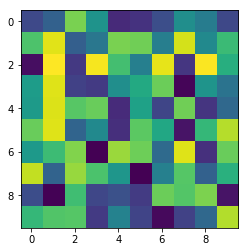

In [2]:
%matplotlib inline
plt.imshow(np.random.rand(10,10), interpolation=None)
plt.show()

__GUIs:__ You can also display a plot in a separate window on your desktop. This uses a
GUI backend toolkit that interacts with the operating system and the desktop environment to create and manage windows (Qt, wx, Tk, GTK, and others).

In [2]:
%matplotlib osx

plt.imshow(np.random.rand(10,10), interpolation=None)
plt.show()

__Notebook Mode__: This mode mixes the beneficts interactive visualization, but integrated into the notebook in the same way as the `inline mode`.

In [7]:
%matplotlib notebook
plt.imshow(np.random.rand(10,10), interpolation=None)
plt.show()

For a comprehensive list of available backends please run:

In [3]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt', 'qt4', 'qt5', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl']


For more info about the `%matplotlib` backend run:

In [4]:
%matplotlib?

### Simple plot

__ A basic random normal signal__

Next is a plot of an unidimensional and discrete signal. It plots the values of the signal in the `y`-axis, while in the `x`-axis displays a regular grid of integer values.

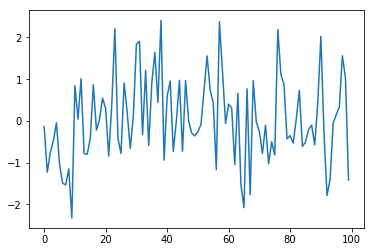

In [2]:
y = np.random.randn(100)
plt.plot(y)
plt.show()

__Function Plotting__

Here we define the define and evaluete the function $y(x) = e^{- x^2} \sin{3x}$, by using NumPy operations, and then display the results with `plot()`. Note that here we define the `x`-axis explicitly.

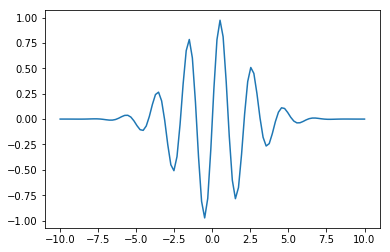

In [6]:
x = np.linspace(-10,10,100)
y = np.exp(-.1 * x**2) * np.sin(3*x)

plt.plot(x, y)
plt.show()

__ Improving visualization__

With the `matplotlib.pyplot` API we can define and customize to displaying objects. Here an example of some pretty things we can do:

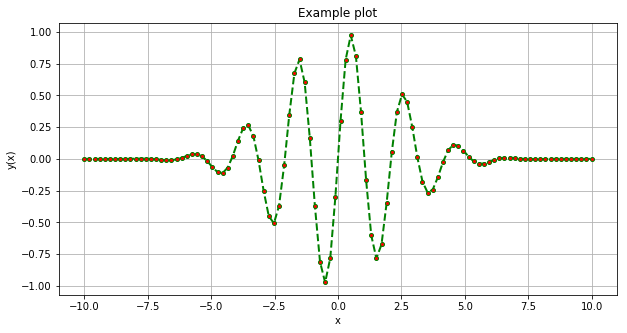

In [7]:
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o--', lw=2, color='green', mfc='red', ms=4)
plt.title("Example plot")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()
plt.show()

__ Logarithmic Plot __

In the case were the values to visualize have orders of magnitude of difference, then it is better to visualizate it in a logarithmic plot: `plt.semilogy()` or `plt.loglog()`.

In [8]:
x = np.linspace(0., 20., 100)
y = np.exp(0.1 * (x + 0.1*np.sin(x))**2)

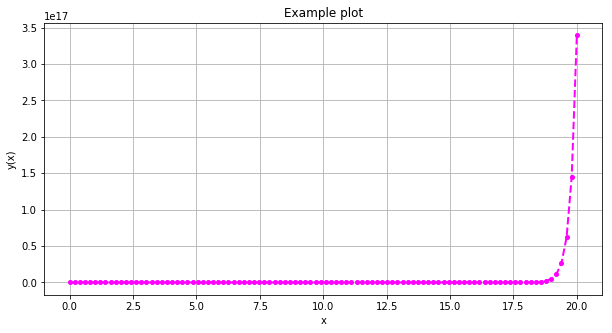

In [9]:
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o--', lw=2, color='magenta', ms=4)
plt.title("Example plot")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()
plt.show()

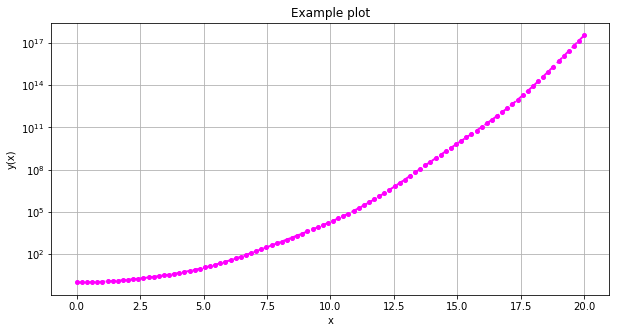

In [10]:
plt.figure(figsize=(10,5))
plt.semilogy(x, y, 'o--', lw=2, color='magenta', ms=4)
plt.title("Example plot")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()
plt.show()

### Multiple Plots

It is also possible to plot multiple "functions" into the same _canvas_.

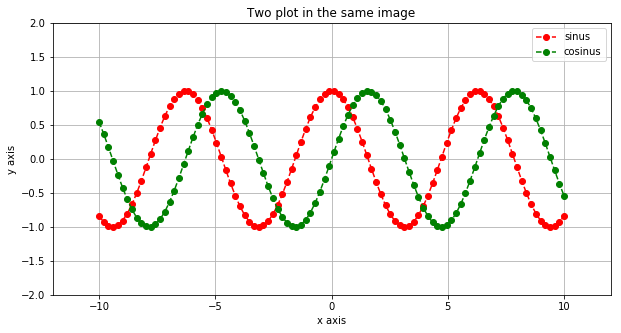

In [11]:
plt.figure(figsize=(10,5))
x = np.linspace(-10, 10, 100)
plt.plot(x, np.cos(x), '--o', color='r', label='sinus')
plt.plot(x, np.sin(x), '--o', color='g', label='cosinus')
plt.ylim(-2,2)
plt.xlim(-12,12)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.grid()
plt.title("Two plot in the same image")
plt.legend(loc=1)
plt.show()

__ 2 subplots__

Or we can create two separate canvas and plot the two functions separately in each of them, by using the `pyplot.subplot()` function.

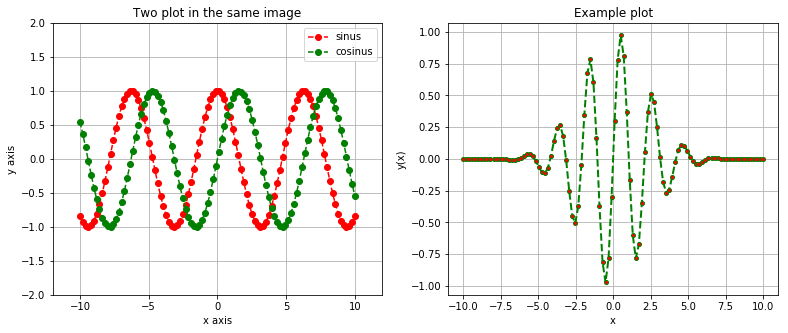

In [9]:
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
x = np.linspace(-10,10,100)
plt.plot(x, np.cos(x), '--o', color='r', label='sinus')
plt.plot(x, np.sin(x), '--o', color='g', label='cosinus')
plt.ylim(-2,2)
plt.xlim(-12,12)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.grid()
plt.title("Two plot in the same image")
plt.legend(loc=1)

plt.subplot(1, 2, 2)
x = np.linspace(-10,10,100)
y = np.exp(-.1 * x**2) * np.sin(3*x)
plt.plot(x, y, 'o--', lw=2, color='green', mfc='red', ms=4)
plt.title("Example plot")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()

plt.show()

__ 4 subplots __

`pyplot.subplot()` allows us to create a grid of plots. It takes tree arguments: `pyplot.subplot(m,n,i)` where `m` and `n` define the size of the grid (`m x n` grid), and `i` is the index of the subplot.

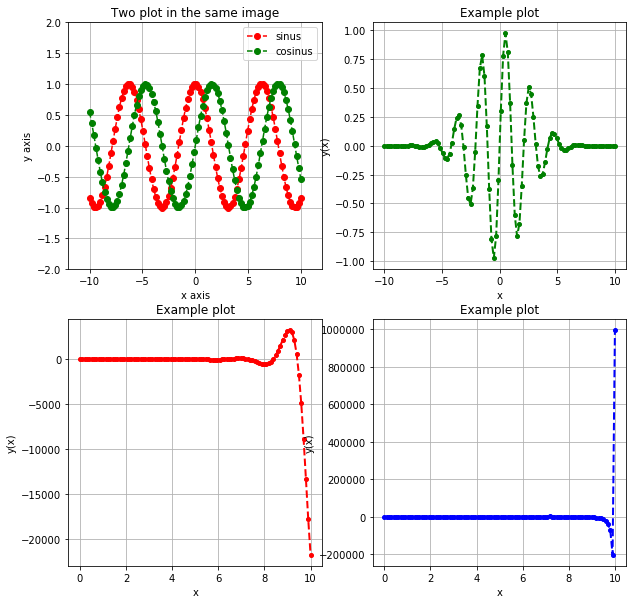

In [10]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
x = np.linspace(-10,10,100)
plt.plot(x, np.cos(x), '--o', color='r', label='sinus')
plt.plot(x, np.sin(x), '--o', color='g', label='cosinus')
plt.ylim(-2,2)
plt.xlim(-12,12)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.grid()
plt.title("Two plot in the same image")
plt.legend(loc=1)

plt.subplot(2, 2, 2)
x = np.linspace(-10,10,100)
y = np.exp(-.1 * x**2) * np.sin(3*x)
plt.plot(x, y, 'o--', lw=2, color='green', ms=4)
plt.title("Example plot")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()

plt.subplot(2, 2, 3)
x = np.linspace(0,10.,100)
y = np.exp(.1 * x**2) * np.sin(3*x)
plt.plot(x, y, 'o--', lw=2, color='red', ms=4)
plt.title("Example plot")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()

plt.subplot(2, 2, 4)
x = np.linspace(0.,10,100)
y = np.exp(.1 * x**2) * np.tan(30*x)
plt.plot(x, y, 'o--', lw=2, color='blue', ms=4)
plt.title("Example plot")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()

plt.show()

### Scatter Plot

Another common type of plot is the scatter plot, which just displays points in two dimensions. It offers a simple way to observe the relationship between two variables in a dataset.

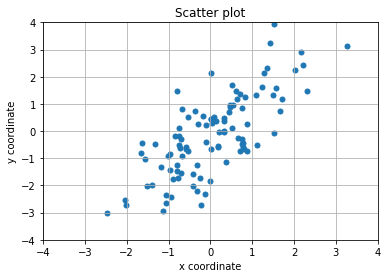

In [11]:
x = np.random.randn(100)
y = x + np.random.randn(100)

plt.scatter(x, y, marker='o', s=25)
plt.grid()
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter plot')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

### Histogram Plot

If we have a given variable $X$ (random or not) for which we are interested in the distribution of its values, an histogram plot it always helpful for such task: __Detecting outliers, empirical distributions, tendencies, etc__. 

In the next example we sample the _normal distribution_ $\mathcal{N}(0,1)$ and plot the distribution of the obtained values: Do you remember the _central limit theorem_?

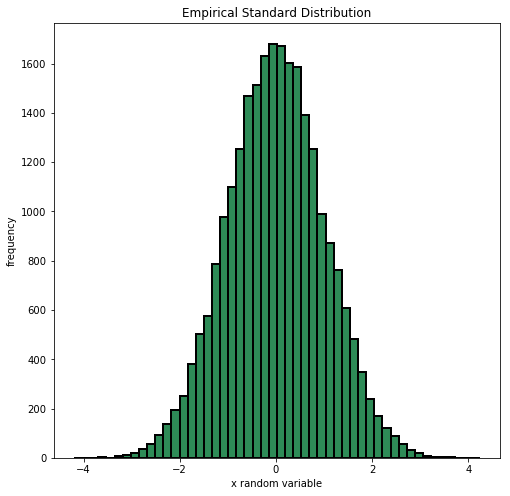

In [14]:
n_samples = 25000
#x = np.random.rand(n_samples)
x = np.random.randn(n_samples)

plt.figure(figsize=(8,8))
plt.hist(x, bins=50, facecolor='seagreen', edgecolor='black', lw=2)
plt.title("Empirical Standard Distribution")
plt.xlabel("x random variable")
plt.ylabel("frequency")
plt.show()

### Images Plot

It is always necessary and a common task to plot and visualize 2D images, let's see how to do that:

In general the image to plot can be:
1. An `m x n x 3` ndarray with `uint8` values between 0-255 representing the RGB values.
2. An `m x n x 3` ndarray with `float32` values between `0.` and `1.` indicating the proportion of RGB values.
3. An `m x n` ndarray with `float32` values between `0.` and `1.` indicating the intensity in a given colormap (greyscale for default).

In [15]:
img = mpimg.imread('data/cat.jpg')
print(img.shape)
print(img)

(521, 750, 3)
[[[123 108 151]
  [124 109 152]
  [125 110 153]
  ..., 
  [ 77  76  92]
  [ 77  76  92]
  [ 76  75  91]]

 [[123 108 151]
  [124 109 152]
  [125 110 153]
  ..., 
  [ 76  78  93]
  [ 76  78  93]
  [ 74  76  91]]

 [[122 107 150]
  [123 108 151]
  [125 110 153]
  ..., 
  [ 73  79  95]
  [ 73  79  95]
  [ 71  77  93]]

 ..., 
 [[216 197 190]
  [216 197 190]
  [215 196 189]
  ..., 
  [ 82 102 129]
  [ 78  98 125]
  [ 79  94 123]]

 [[216 197 190]
  [216 197 190]
  [215 196 189]
  ..., 
  [ 85 105 132]
  [ 75  95 122]
  [ 69  84 113]]

 [[218 199 192]
  [217 198 191]
  [216 197 190]
  ..., 
  [ 77  97 124]
  [ 80 100 127]
  [ 83 100 128]]]


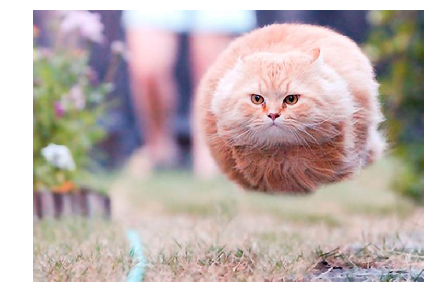

In [16]:
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.axis('off')
plt.show()

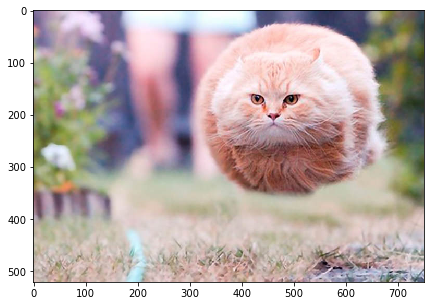

In [17]:
# Now with the float 0-1 representation
img2 = img.astype(float)/255

plt.figure(figsize=(7,7))
plt.imshow(img2)
#plt.axis('off')
plt.show()

__ Visualizing each channel independently__

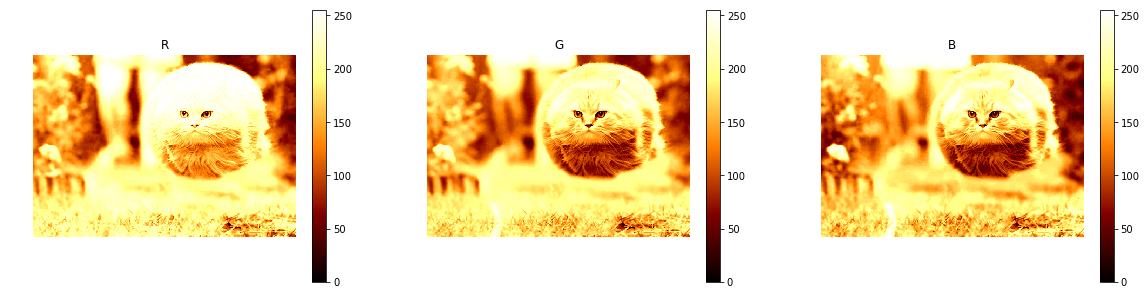

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.imshow(img[:,:,0], cmap='afmhot')
plt.title('R')
plt.colorbar()
plt.axis('off')

plt.subplot(1,3,2)
plt.title('G')
plt.imshow(img[:,:,1], cmap='afmhot')
plt.colorbar()
plt.axis('off')

plt.subplot(1,3,3)
plt.title('B')
plt.imshow(img[:,:,2], cmap='afmhot')
plt.colorbar()
plt.axis('off')

plt.show()

__ Carefull with what you think you are looking! __

`plt.imshow()` uses interpolation to get smooth plots, so we don't see the exact same image, but an improved one. We load a very low (resolution) image and visualize it:

In [19]:
_img = np.load('data/orion.npy')
print(_img.shape)
print(_img.dtype)

(100, 100)
>f4


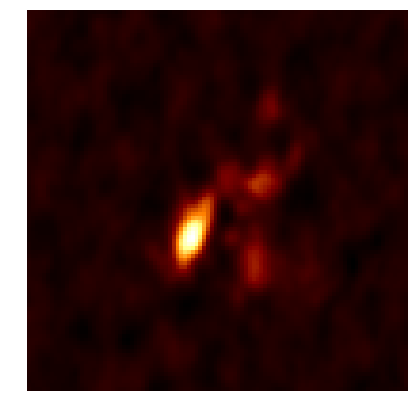

In [21]:
# no interpolation at all by default
plt.figure(figsize=(7,7))
plt.imshow(_img, cmap='afmhot')
plt.axis('off')
plt.show()

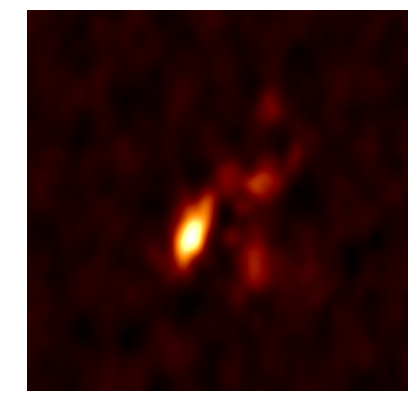

In [22]:
plt.figure(figsize=(7,7))
plt.imshow(_img, cmap='afmhot', interpolation='bilinear')
plt.axis('off')
plt.show()

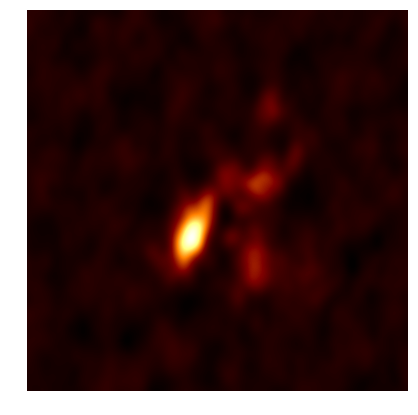

In [23]:
plt.figure(figsize=(7,7))
plt.imshow(_img, cmap='afmhot', interpolation='bicubic')
plt.axis('off')
plt.show()

### Surfaces Plot

Let's say we want to visualize a multivariate function $f(x,y): \mathbb{R}^2 \rightarrow \mathbb{R}$. Then we need a 3D space to plot it.

First we define the multivariate function to plot:

In [26]:
def f(x,y):
    return np.exp(-(x**2+y**2)) + 0.1 * np.sin(30*(x**2+y**2))

In order to evaluate it, we need a __grid__ of point where to perform such evaluation: 

In [27]:
x = np.array([0., 0.25, 0.5, 0.75, 1.])
y = np.array([0., 0.25, 0.5, 0.75, 1.])

X,Y = np.meshgrid(x,y)

print('X grid: \n', X)
print()
print('Y grid: \n', Y)

X grid: 
 [[ 0.    0.25  0.5   0.75  1.  ]
 [ 0.    0.25  0.5   0.75  1.  ]
 [ 0.    0.25  0.5   0.75  1.  ]
 [ 0.    0.25  0.5   0.75  1.  ]
 [ 0.    0.25  0.5   0.75  1.  ]]

Y grid: 
 [[ 0.    0.    0.    0.    0.  ]
 [ 0.25  0.25  0.25  0.25  0.25]
 [ 0.5   0.5   0.5   0.5   0.5 ]
 [ 0.75  0.75  0.75  0.75  0.75]
 [ 1.    1.    1.    1.    1.  ]]


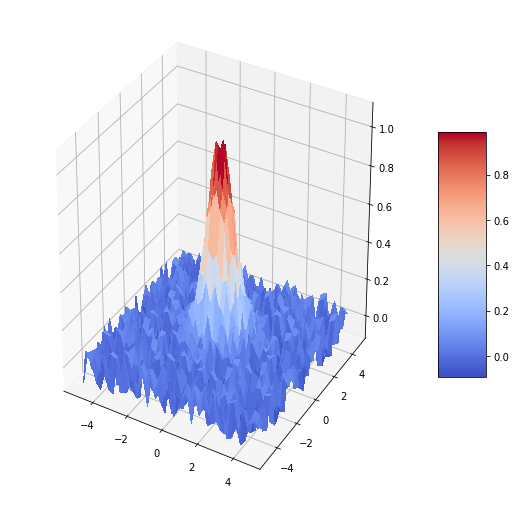

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.1, 1.1)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show();

### 3D Scatter Plot

In the same way we perform an scatter plot in 2D, we can do it in a 3D space.

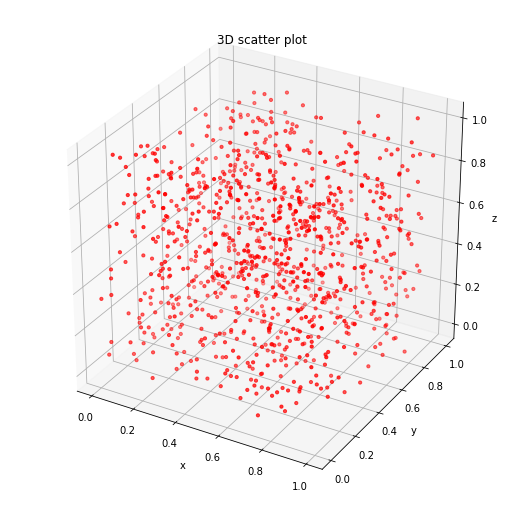

In [29]:
# we first generate N random points in the 3D space
N = 1000
x = np.random.random(N)
y = np.random.random(N)
z = np.random.random(N)

# visualization of points
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o', s=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D scatter plot')
plt.show()

<div id='interact' />
## 2.- Interactive Visuzalization

### 2.1- `interact` IPython Widget

The `interact` function (`ipywidgets.interact`) automatically creates a user interface (UI) controls for exploring code and data interactively. It is the __easiest way__ to get started using IPython’s widgets.

In [30]:
from ipywidgets import interact

At the most basic level, `interact` autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use `interact`
, you __need to define a function that you want to explore__. Here is a function that prints its only argument x.

In [32]:
def f(x):
    return x

When you pass this function as the first argument to `interact` along with an integer keyword argument (x=10), a slider is generated and bound to the function parameter.

In [34]:
interact(f, x=10);

When you move the slider, the function is called, which prints the current value of x.

If you pass True or False, interact will generate a checkbox:

In [35]:
interact(f, x=True);

If you pass a string, `interact` will generate a text area.


In [36]:
interact(f, x='Hi there!');

`interact` can also be used as a decorator. This allows you to define a function and interact with it in a single shot. As this example shows, interact also works with functions that have multiple arguments.

In [37]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

### Fixing arguments using `fixed`

There are times when you may want to explore a function using interact, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the `fixed` function.

In [38]:
from ipywidgets import fixed

In [39]:
def h(p, q):
    return (p, q)

When we call `interact`, we pass `fixed(20)` for `q` to hold it fixed at a value of `20`.

In [40]:
interact(h, p=5, q=fixed(20));

### Widget types and abbreviations

In [42]:
from ipywidgets import IntSlider, FloatSlider

* __Checkbox__: `True` or `False`

In [43]:
interact(f, x=True);

* __Text__: Keyword argument: `some string` 

In [44]:
interact(f, x='hi there');

* __IntSlider__: `value` or `(min, max)` or `(min, max, step)` if integers are passed.

When you pass an integer-valued keyword argument of `10` (`x=10`) to `interact`, it generates an integer-valued slider control with a range of `[-10,+3*10]`. In this case, `10` is an abbreviation for an actual slider widget:

In [43]:
IntSlider(min=-10,max=30,step=1,value=10)

In [44]:
interact(f, x=IntSlider(min=-10,max=30,step=1,value=10));

but you can also use abbreviation in order to avoid instantiating `IntSlider` by yourself:

In [48]:
interact(f, x=(500,1000,4));

* __Float__: `value` or `(min,max)` or `(min, max, step)` if floats are passed.

The same apply also for float values, you can use the `FloatSlider` constructor, or the abbreviation form:

In [46]:
interact(f, x=FloatSlider(min=-2., max=7., step=0.1, value=2.));

In [49]:
interact(f, x=(-2., 7., 0.1));

* __Dropdown__: `['string1', 'string2']` or `{'string1':value1, 'string2':value2}`. 

In [50]:
interact(f, x=['orange', 'apple']);

In [51]:
interact(f, x={1:'orange', 2:'apple'});

## 2.2- Using `interact` for visualization

Now with all your knowledge of __`matplotlib`__ and __`interact`__ you have all what you need to perform __interactive visualization__!

In this section we will use this tools to perform interactive data visualization over a __3D spectroscopic data line cube__ of  __Orion Nebulae__. We first load the data:

In [52]:
data = np.load("orion.npy")
print('Shape:', data.shape)
print('Data type:', data.dtype)

Shape: (41, 100, 100)
Data type: >f4


The `axis0` is for frequency and the other two are for spatial coordinates. We want to see images of the slices in the frequency axis, in a interactive way.

For that we need to define the corresponding function to pass to `interact`:

In [53]:
def slice_show(data, i):
    plt.figure(figsize=(8,8))
    plt.imshow(data[i,:,:], cmap='afmhot', vmin=0., vmax=1.)
    plt.grid()
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.show()

In [54]:
interact(slice_show, data=fixed(data), i=(0,40));

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


__Let's improve the interactivity!__

In [55]:
def slice_show2(data, i, title='', show_colorbar=False, colormap='afmthot'):
    plt.figure(figsize=(8,8))
    plt.imshow(data[i,:,:], cmap=colormap, vmin=0., vmax=1.)
    plt.grid()
    plt.title(title)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    if show_colorbar: plt.colorbar()
    plt.show()

In [56]:
# full list of available colormaps:
# https://matplotlib.org/examples/color/colormaps_reference.html
colormap_list = ['afmhot','gray','plasma','inferno','copper','gist_heat','jet',]

interact(slice_show2, data=fixed(data), i=(0,40), title='Orion Nebulae', \
         show_colorbar=False, colormap=colormap_list);

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


Finally we will use the _Scikit-image_ library to extend our interactive visualization, by adding image processing over each slice of the cube, applying different filters/kernels to the image:

In [57]:
def slice_show3(data, i, title='', show_colorbar=False, colormap='afmthot', img_filter=None):
    if img_filter is not None:
        _data = np.empty(data.shape)
        for j in range(data.shape[0]):
            _data[i,:,:] = img_filter(data[i,:,:])
        data = _data
        
    plt.figure(figsize=(8,8))
    plt.imshow(data[i,:,:], cmap=colormap, vmin=data.min(), vmax=data.max())
    plt.grid()
    plt.title(title)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    if show_colorbar: plt.colorbar()
    plt.show()

In [58]:
from skimage import filters

# dictionary with the kernel to be used
filters = {'none':None, 'gaussian':filters.gaussian, 'hessian':filters.hessian, 'laplace':filters.laplace, \
           'sobel':filters.sobel, 'frangi':filters.frangi, 'median':filters.median, 'prewitt':filters.prewitt}

# full list of available filters:
# http://scikit-image.org/docs/dev/api/skimage.filters.html

In [59]:
interact(slice_show3, data=fixed(data), i=(0,40), title='Orion Nebulae', \
         show_colorbar=False, colormap=colormap_list, img_filter=filters);

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


## References

[Using interact documentation](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)